## BIKE SHARING ASSIGNMENT

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [228]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing Scikit Library for evaluating requirement specific parameters and performing preprocessing steps (like Splitting & Scaling)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

#Importing StatsModel Library for displaying detailed information about model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
#importing csv data from file
bike =pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [143]:
bike.shape

(730, 16)

In [144]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [145]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [146]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [147]:
bike.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

**There are no null values in either columns or in rows**

In [148]:
bike_new = bike.copy()
bike_new.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Exploratory Data Analysis

In [149]:
bike_new['season'] = bike_new['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bike_new['yr'] = bike_new['yr'].replace({0:2018, 1:2019})

bike_new['weathersit'] = bike_new['weathersit'].replace({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Heavy Rain'})

In [150]:
bike_new.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,1,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,2,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


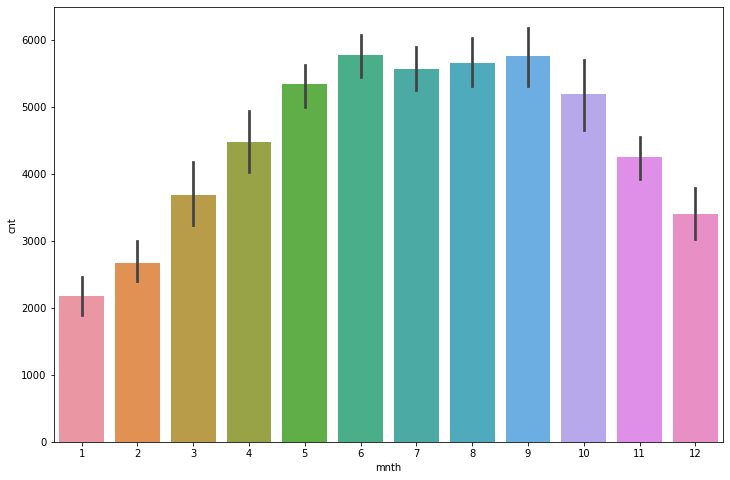

In [151]:
plt.figure(figsize=[12,8])
sns.barplot(bike_new.mnth, bike_new.cnt)
plt.show()

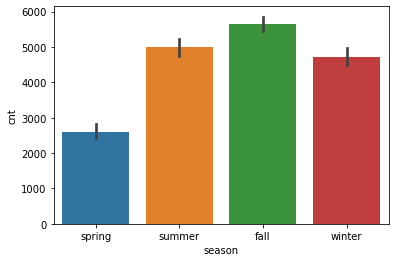

In [152]:
sns.barplot(bike_new.season, bike_new.cnt)
plt.show()

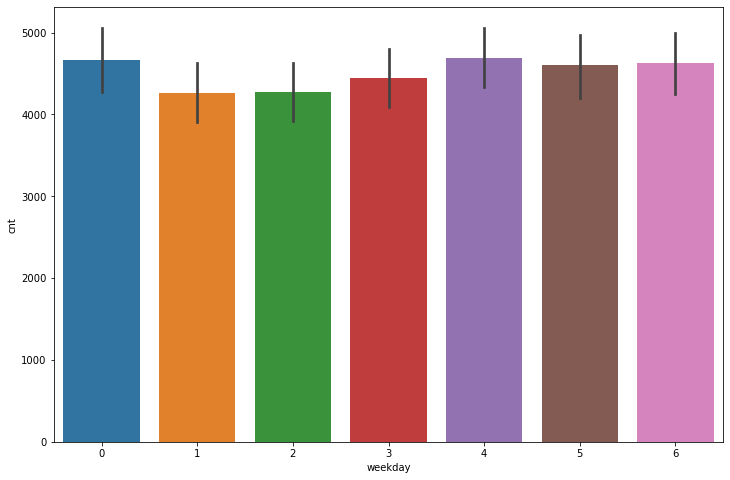

In [153]:
plt.figure(figsize=[12,8])
sns.barplot(bike_new.weekday, bike_new.cnt)

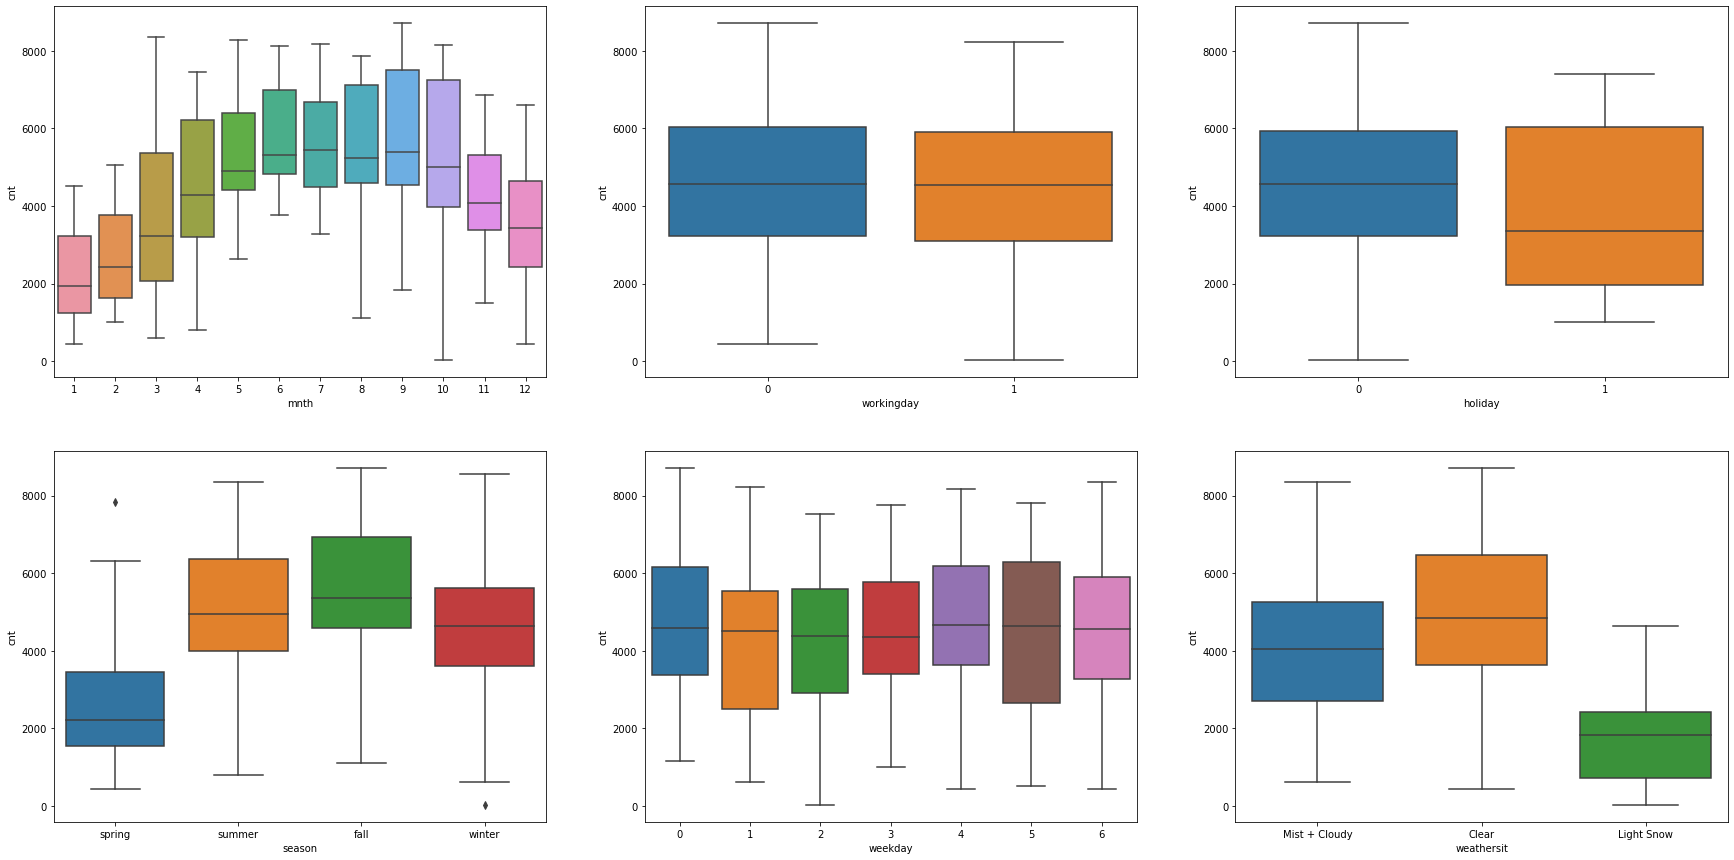

In [154]:
#creating box plot for all categorical variables against target varible 'cnt' using data frame bike_raw i.e before creation of dummy variables
plt.figure(figsize=(30,15))
plt.subplot(2,3,1)
sns.boxplot(x='mnth',y='cnt',data=bike_new)
plt.subplot(2,3,2)
sns.boxplot(x='workingday',y='cnt',data=bike_new)
plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',data=bike_new)
plt.subplot(2,3,4)
sns.boxplot(x='season',y='cnt',data=bike_new)
plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike_new)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_new)
plt.show()

### **Insights**
#### **There were 6 categorical variables in the dataset.**

used Box plot (fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that were derived:

***season***: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.


***mnth***: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.


***weathersit***: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.


***holiday***: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.


***weekday***: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

***workingday***: Working Day / Non-Working Day shows almost similar behaviour (after just visualising the data)

In [155]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


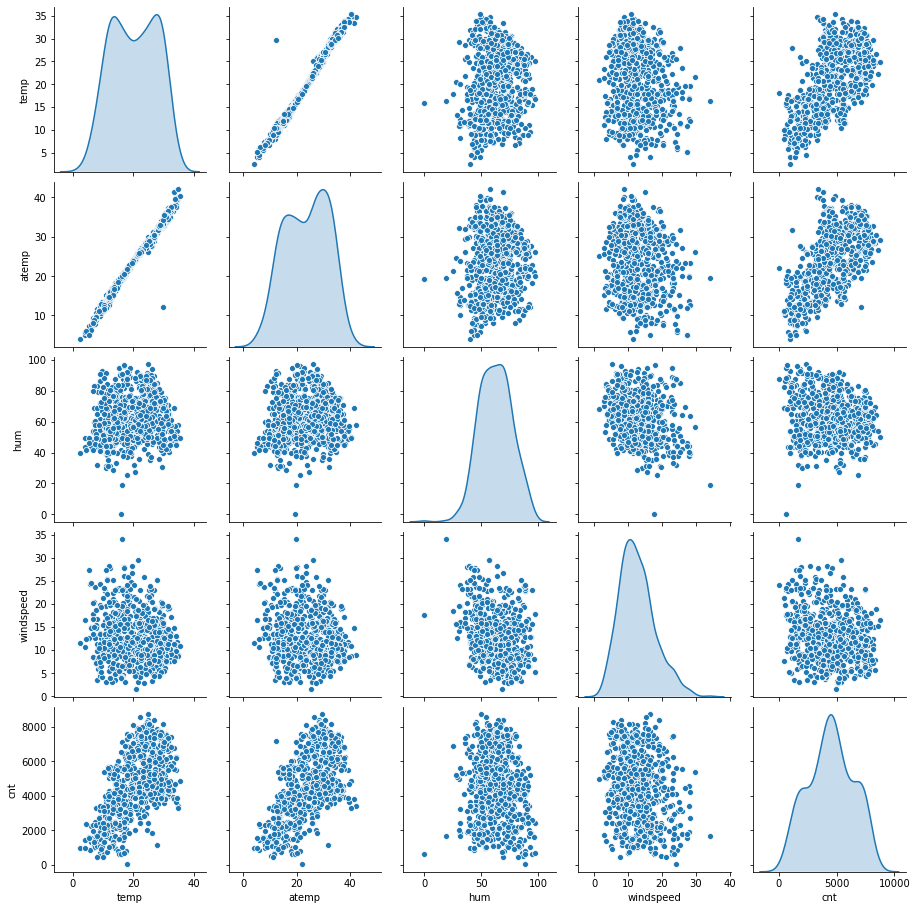

In [156]:
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()              

**FROM ABOVE PAIR PLOT IT CAN BE SEEN THAT THERE IS A LINEAR RELATIONSHIP BETWEEN temp , atemp and cnt**

### correlation matrix

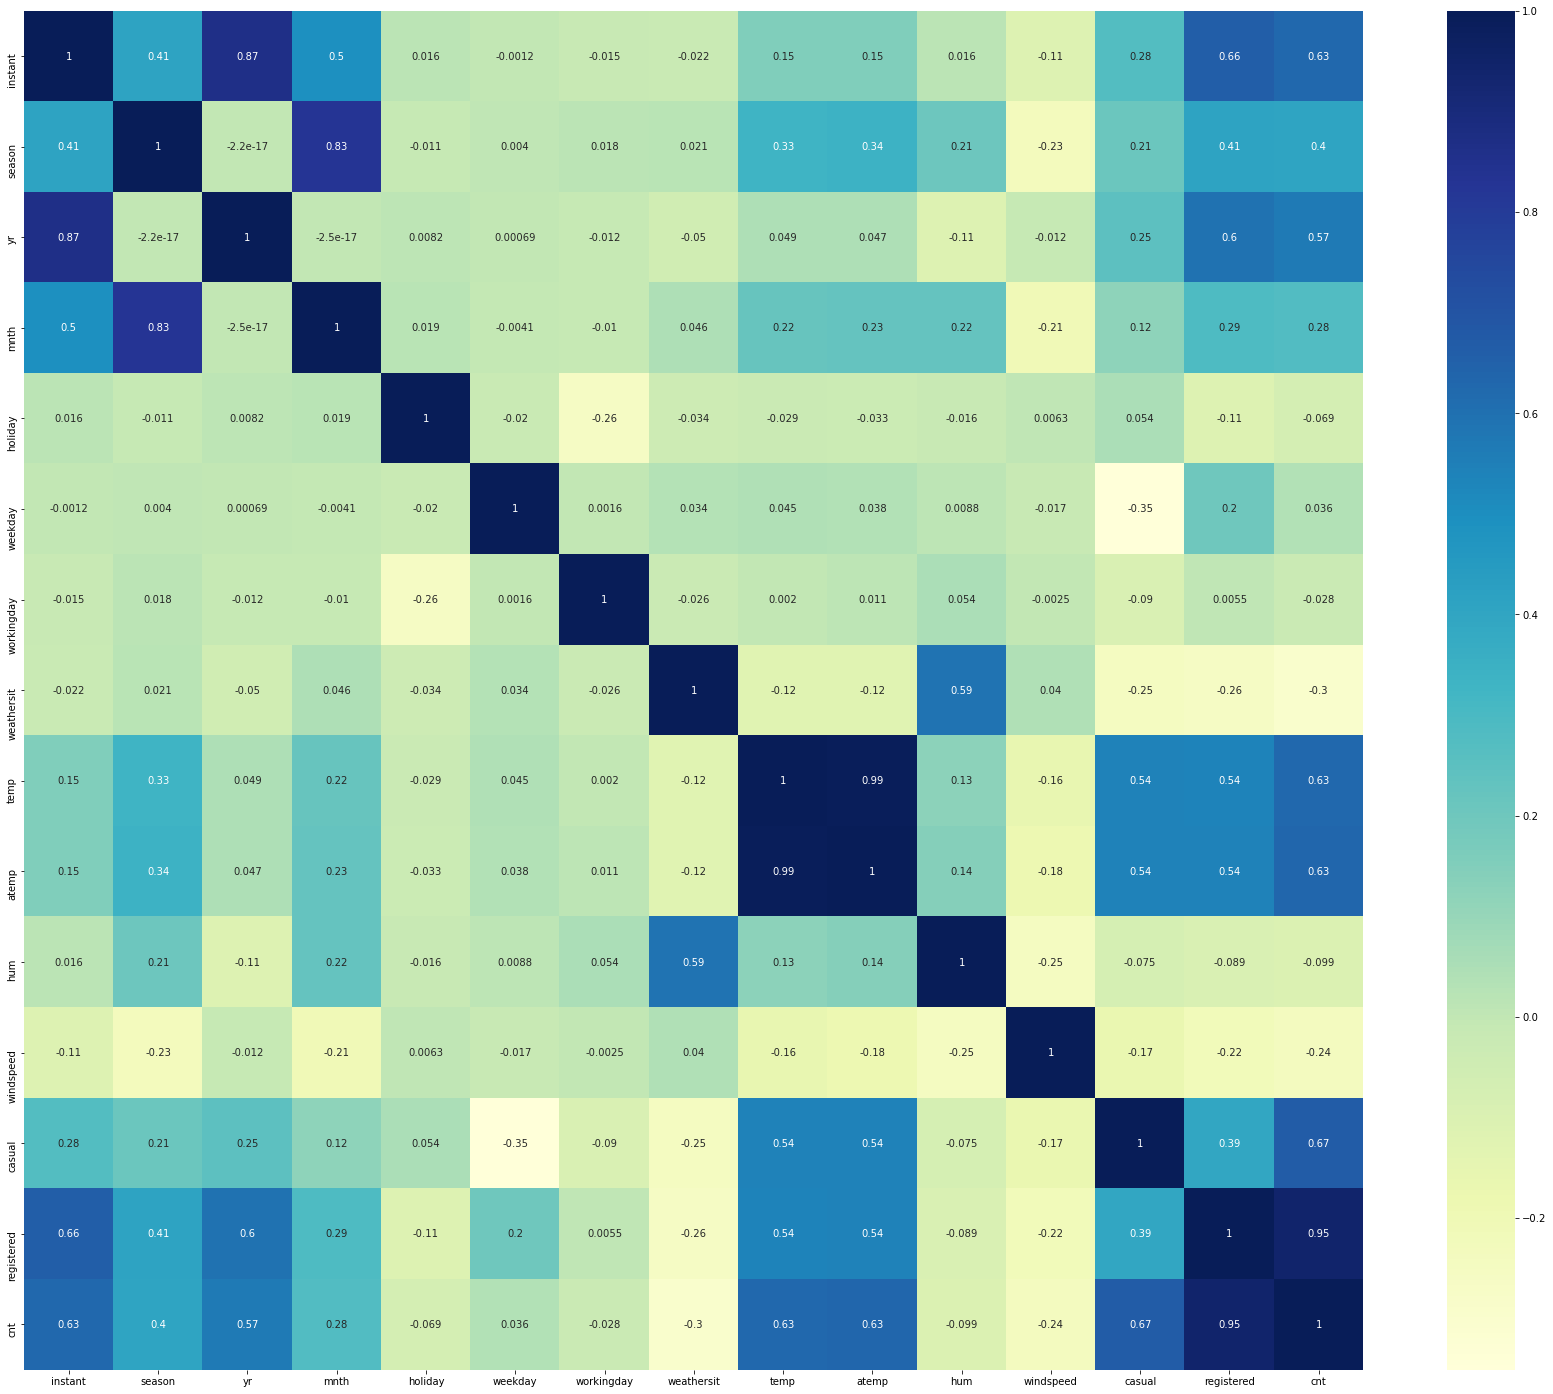

In [157]:
plt.figure(figsize=[30,25])
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()

**Insights**

We will go ahead and drop "Adjusted Temperature" column as any one can be dropped among temp and atemp since they are highly correlated and provide almost same explanation

From the above Correlation Coefficient Heatmap,it can be seen that no other except temp and atemp variable is highly correlated with another variable in any way. So, we can further proceed and check Multi-Collinearity while creating models itself

### Removing redundant and unwanted columns:

In [158]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [159]:
bike.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [160]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Creating dummy variables

creating DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit' as 'temp,'atemp','windspeed','hum' are continuous numerical data where as 'yr','holiday','workingday' are binary data.

Before creating dummy variables, converting them into 'category' data types

In [161]:
bike['mnth'] = bike['mnth'].astype('category')
bike['season'] =bike['season'].astype('category')
bike['weekday'] = bike['weekday'].astype('category')
bike['weathersit'] = bike['weathersit'].astype('category')

In [162]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [163]:
bike = pd.get_dummies(bike, drop_first=True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


## SPLITTING THE DATA

In [164]:
np.random.seed(0)
train_df, test_df = train_test_split(bike,train_size=0.7, random_state=100)

In [165]:
train_df.shape

(510, 30)

In [166]:
test_df.shape

(220, 30)

In [167]:
scaler = MinMaxScaler()

In [168]:
train_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [169]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

train_df[num_vars] = scaler.fit_transform(train_df[num_vars])

In [170]:
train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [171]:
train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building a model

In [172]:
y_train = train_df.pop('cnt')
X_train = train_df

### RFE Recursive feature elimination

In [173]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [174]:
rfe = RFE(lr,15)
rfe = rfe.fit(X_train, y_train)

In [175]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [177]:
col= X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [178]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [179]:
X_train_rfe = X_train[col]

## Building linear model using stats model

### Model 1

**VIF CHECK**

In [180]:
vif = pd.DataFrame()
vif['feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,feature,VIF
2,temp,24.63
3,hum,15.53
6,season_3,8.80
4,windspeed,3.81
5,season_2,3.75
7,season_4,3.11
13,weathersit_2,2.15
0,yr,2.05
10,mnth_8,1.85
9,mnth_5,1.68


In [181]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [182]:
lr1.params

const           0.237384
yr              0.230442
holiday        -0.088900
temp            0.486920
hum            -0.179606
windspeed      -0.183865
season_2        0.116592
season_3        0.042479
season_4        0.152975
mnth_3          0.032292
mnth_5          0.028201
mnth_8          0.050905
mnth_9          0.120667
mnth_10         0.040741
weathersit_2   -0.054170
weathersit_3   -0.242870
dtype: float64

In [183]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          1.00e-188
Time:                        17:15:51   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665      0.000       0.184       0.291
yr               0.2304      0.008     28.453      0.000       0.215       0.246
holiday         -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp             0.4869      0.034     14.119      0.000       0.419       0.555
hum             -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed       -0.1839      0.026     -7.162      0.000      -0.234      -0.133
season_2         0.1166      0.015      7.527      0.000       0.086       0.147
season_3         0.0425      0.023      1.847      0.065      -0.003       0.088
season_4         0.1530      0.014     10.801      0.000       0.125       0.181
mnth_3           0.0323      0.015      2.196      0.029       0.003       0.061
mnth_5           0.0282      0.018      1.581      0.115      -0.007       0.063
mnth_8           0.0509      0.017      2.913      0.004       0.017       0.085
mnth_9           0.1207      0.017      6.984      0.000       0.087       0.155
mnth_10          0.0407      0.018      2.314      0.021       0.006       0.075
weathersit_2    -0.0542      0.010     -5.187      0.000      -0.075      -0.034
weathersit_3    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2

removing variable season_3 based on high p value and high vif

In [184]:
X_train_new = X_train_rfe.drop(['season_3'], axis=1)

#### ***VIF CHECK***

In [185]:
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,hum,14.87
2,temp,10.03
4,windspeed,3.75
6,season_4,2.33
5,season_2,2.31
12,weathersit_2,2.14
0,yr,2.03
8,mnth_5,1.62
9,mnth_8,1.62
11,mnth_10,1.60


In [186]:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [187]:
lr2.params

const           0.236727
yr              0.229068
holiday        -0.091034
temp            0.535196
hum            -0.187893
windspeed      -0.188284
season_2        0.098851
season_4        0.139998
mnth_3          0.026108
mnth_5          0.022430
mnth_8          0.062251
mnth_9          0.130898
mnth_10         0.036135
weathersit_2   -0.052894
weathersit_3   -0.237775
dtype: float64

In [188]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          3.87e-189
Time:                        17:23:17   Log-Likelihood:                 512.21
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     495   BIC:                            -930.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2367      0.027      8.621      0.000       0.183       0.291
yr               0.2291      0.008     28.334      0.000       0.213       0.245
holiday         -0.0910      0.026     -3.566      0.000      -0.141      -0.041
temp             0.5352      0.023     23.728      0.000       0.491       0.580
hum             -0.1879      0.038     -4.975      0.000      -0.262      -0.114
windspeed       -0.1883      0.026     -7.349      0.000      -0.239      -0.138
season_2         0.0989      0.012      8.113      0.000       0.075       0.123
season_4         0.1400      0.012     11.357      0.000       0.116       0.164
mnth_3           0.0261      0.014      1.819      0.069      -0.002       0.054
mnth_5           0.0224      0.018      1.274      0.203      -0.012       0.057
mnth_8           0.0623      0.016      3.795      0.000       0.030       0.094
mnth_9           0.1309      0.016      7.978      0.000       0.099       0.163
mnth_10          0.0361      0.017      2.068      0.039       0.002       0.070
weathersit_2    -0.0529      0.010     -5.063      0.000      -0.073      -0.032
weathersit_3    -0.2378      0.026     -9.020      0.000      -0.290      -0.186
==============================================================================
Omnibus:                       64.808   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.941
Skew:                          -0.685   Prob(JB):                     1.24e-32
Kurtosis:                       5.245   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Model 3**


#### **Removing the variable 'hum' based on its Very High 'VIF' value.**

#### **Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.**

In [189]:
X_train_new = X_train_new.drop(['hum'], axis=1)

#### ***VIF CHECK***

In [190]:
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,temp,5.22
3,windspeed,3.33
4,season_2,2.31
0,yr,2.02
5,season_4,1.97
8,mnth_8,1.62
7,mnth_5,1.61
10,mnth_10,1.59
11,weathersit_2,1.51
9,mnth_9,1.35


In [197]:
# Adding a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Creating a fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [199]:
#checking parameters
lr3.params

const           0.128485
yr              0.232914
holiday        -0.092774
temp            0.514754
windspeed      -0.153571
season_2        0.099847
season_4        0.131025
mnth_3          0.025847
mnth_5          0.009057
mnth_8          0.059660
mnth_9          0.123013
mnth_10         0.030998
weathersit_2   -0.082213
weathersit_3   -0.288157
dtype: float64

In [200]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.4
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          4.53e-185
Time:                        17:32:17   Log-Likelihood:                 499.77
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     496   BIC:                            -912.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1285      0.017      7.492      0.000       0.095       0.162
yr               0.2329      0.008     28.274      0.000       0.217       0.249
holiday         -0.0928      0.026     -3.550      0.000      -0.144      -0.041
temp             0.5148      0.023     22.674      0.000       0.470       0.559
windspeed       -0.1536      0.025     -6.085      0.000      -0.203      -0.104
season_2         0.0998      0.012      8.007      0.000       0.075       0.124
season_4         0.1310      0.012     10.496      0.000       0.106       0.156
mnth_3           0.0258      0.015      1.760      0.079      -0.003       0.055
mnth_5           0.0091      0.018      0.508      0.611      -0.026       0.044
mnth_8           0.0597      0.017      3.555      0.000       0.027       0.093
mnth_9           0.1230      0.017      7.359      0.000       0.090       0.156
mnth_10          0.0310      0.018      1.736      0.083      -0.004       0.066
weathersit_2    -0.0822      0.009     -9.311      0.000      -0.100      -0.065
weathersit_3    -0.2882      0.025    -11.565      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       61.945   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.809
Skew:                          -0.665   Prob(JB):                     1.96e-30
Kurtosis:                       5.161   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Model 4**


#### **Removing the variable 'mnth_5' based on its Very High 'P value.**

In [201]:
X_train_new = X_train_new.drop(['mnth_5'], axis=1)

#### ***VIF CHECK***

In [203]:
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,temp,5.11
3,windspeed,3.30
0,yr,2.01
5,season_4,1.96
4,season_2,1.83
7,mnth_8,1.61
9,mnth_10,1.59
10,weathersit_2,1.50
8,mnth_9,1.34
6,mnth_3,1.19


In [204]:
X_train_lm4 = sm.add_constant(X_train_new)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [205]:
lr4.params

const           0.128522
yr              0.232695
holiday        -0.093024
temp            0.515889
windspeed      -0.154559
season_2        0.102739
season_4        0.130873
mnth_3          0.024687
mnth_8          0.058972
mnth_9          0.122457
mnth_10         0.030822
weathersit_2   -0.081872
weathersit_3   -0.288294
dtype: float64

In [206]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.9
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          3.47e-186
Time:                        17:38:58   Log-Likelihood:                 499.64
No. Observations:                 510   AIC:                            -973.3
Df Residuals:                     497   BIC:                            -918.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1285      0.017      7.500      0.000       0.095       0.162
yr               0.2327      0.008     28.307      0.000       0.217       0.249
holiday         -0.0930      0.026     -3.563      0.000      -0.144      -0.042
temp             0.5159      0.023     22.852      0.000       0.472       0.560
windspeed       -0.1546      0.025     -6.147      0.000      -0.204      -0.105
season_2         0.1027      0.011      9.265      0.000       0.081       0.125
season_4         0.1309      0.012     10.495      0.000       0.106       0.155
mnth_3           0.0247      0.015      1.702      0.089      -0.004       0.053
mnth_8           0.0590      0.017      3.528      0.000       0.026       0.092
mnth_9           0.1225      0.017      7.347      0.000       0.090       0.155
mnth_10          0.0308      0.018      1.728      0.085      -0.004       0.066
weathersit_2    -0.0819      0.009     -9.306      0.000      -0.099      -0.065
weathersit_3    -0.2883      0.025    -11.580      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       61.567   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.060
Skew:                          -0.666   Prob(JB):                     7.75e-30
Kurtosis:                       5.129   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Model 5**

In [207]:
X_train_new = X_train_new.drop(['mnth_3'], axis=1)

#### ***VIF CHECK***

In [208]:
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_4,1.93
4,season_2,1.83
6,mnth_8,1.59
8,mnth_10,1.59
9,weathersit_2,1.49
7,mnth_9,1.34
10,weathersit_3,1.10


In [209]:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [210]:
lr5.params

const           0.134589
yr              0.232902
holiday        -0.095584
temp            0.509882
windspeed      -0.151673
season_2        0.102630
season_4        0.126600
mnth_8          0.056896
mnth_9          0.120773
mnth_10         0.031119
weathersit_2   -0.081965
weathersit_3   -0.286944
dtype: float64

In [211]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          9.45e-187
Time:                        17:49:06   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1346      0.017      8.014      0.000       0.102       0.168
yr               0.2329      0.008     28.281      0.000       0.217       0.249
holiday         -0.0956      0.026     -3.660      0.000      -0.147      -0.044
temp             0.5099      0.022     22.823      0.000       0.466       0.554
windspeed       -0.1517      0.025     -6.035      0.000      -0.201      -0.102
season_2         0.1026      0.011      9.237      0.000       0.081       0.124
season_4         0.1266      0.012     10.345      0.000       0.103       0.151
mnth_8           0.0569      0.017      3.406      0.001       0.024       0.090
mnth_9           0.1208      0.017      7.245      0.000       0.088       0.154
mnth_10          0.0311      0.018      1.741      0.082      -0.004       0.066
weathersit_2    -0.0820      0.009     -9.299      0.000      -0.099      -0.065
weathersit_3    -0.2869      0.025    -11.510      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       61.862   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.356
Skew:                          -0.653   Prob(JB):                     2.02e-31
Kurtosis:                       5.224   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Model 6**


#### **Removing the variable 'mnth_10' based onhigh p value

In [212]:
X_train_new = X_train_new.drop(['mnth_10'], axis=1)

#### ***VIF CHECK***

In [213]:
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.82
6,mnth_8,1.58
8,weathersit_2,1.49
5,season_4,1.48
7,mnth_9,1.31
9,weathersit_3,1.08
1,holiday,1.04


In [214]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [217]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Thu, 16 Sep 2021   Prob (F-statistic):          2.62e-187
Time:                        17:54:02   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1307      0.017      7.837      0.000       0.098       0.163
yr               0.2326      0.008     28.191      0.000       0.216       0.249
holiday         -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp             0.5173      0.022     23.546      0.000       0.474       0.561
windspeed       -0.1497      0.025     -5.950      0.000      -0.199      -0.100
season_2         0.1012      0.011      9.116      0.000       0.079       0.123
season_4         0.1371      0.011     12.843      0.000       0.116       0.158
mnth_8           0.0541      0.017      3.249      0.001       0.021       0.087
mnth_9           0.1163      0.017      7.046      0.000       0.084       0.149
weathersit_2    -0.0811      0.009     -9.200      0.000      -0.098      -0.064
weathersit_3    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **INSIGHT** : - 
#### **This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number)**


**From the lr6 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS**

### **F Statistics**
**F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.**

**F-statistic: 250.5
Prob (F-statistic): 2.62e-187
The F-Statistics value of 232 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant**

### *** VALIDATE ASSUMPTIONS***

Error terms are normally distributed with mean zero (not X, Y)

Residual Analysis Of Training Data

In [218]:
y_pred = lr6.predict(X_train_lm6)

In [219]:
res = y_train - y_pred

Text(0.5, 0, 'Errors')

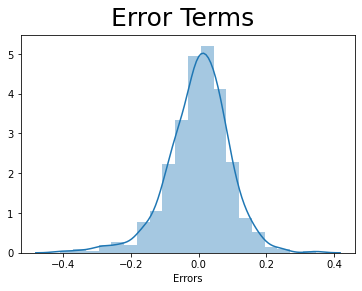

In [221]:
fig = plt.figure()
sns.distplot(res, bins=20)
fig.suptitle('Error Terms', fontsize = 25)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10) 

### **INSIGHT**

**From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid**

## MAKING PREDICTION USING FINAL MODEL

**Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)**

#### ***Applying the scaling on the test sets***

In [222]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

test_df[num_vars] = scaler.transform(test_df[num_vars])

In [223]:
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Dividing into X_test and y_test

In [224]:
y_test = test_df.pop('cnt')
X_test = test_df
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null  

In [225]:
col1 = X_train_new.columns
X_test = X_test[col1]

X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_8        220 non-null    uint8  
 8   mnth_9        220 non-null    uint8  
 9   weathersit_2  220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [226]:
# Making predictions using the final model (lr6)
y_pred = lr6.predict(X_test_lm6)

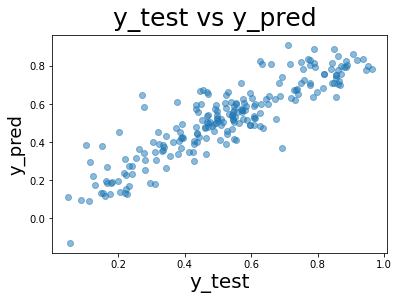

In [227]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 25)              # Plot heading 
plt.xlabel('y_test', fontsize = 20)                          # X-label
plt.ylabel('y_pred', fontsize = 18) 
plt.show()

### **Insight**
**Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points**

## **R^2 Value for TEST**

In [229]:
r2_score(y_test, y_pred)

0.7935224695104377

## **Adjusted R^2 Value for TEST**

In [230]:
r2 = 0.7935224695104377
n = X_test.shape[0]

p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1) 
adjusted_r2

0.7836431618315113

### **Final Result Comparison**
**Train R^2 :0.834**

**Train Adjusted R^2 :0.831**

**Test R^2 :0.793**

**Test Adjusted R^2 :0.783**

**This seems to be a really good model that can very well 'Generalize' various datasets.**

## **FINAL REPORT**
### **As per our final Model, the top 3 predictor variables that influences the bike booking are:**

***Temperature (temp)*** - A coefficient value of ‘0.5749’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5749 units.

***Weather Situation 3 (weathersit_3)*** - A coefficient value of ‘-0.3094’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3094 units.

***Year (yr)*** - A coefficient value of ‘0.2304’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2304 units.

**So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking**

### **The next best features that can also be considered are**

***season_4*** - A coefficient value of ‘0.1371’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1332 units.

***windspeed*** - A coefficient value of ‘-0.1497’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1545 units.